# Machine Learning 44: Gaussian Mixture Models (GMMs)

## **1. Introduction**

### **What is a Gaussian Mixture Model (GMM)?**

A **Gaussian Mixture Model (GMM)** is a **probabilistic model** that assumes data points are generated from a combination (or mixture) of several **Gaussian (normal) distributions** with unknown parameters.
Each Gaussian distribution represents a **cluster**, and each cluster is characterized by:

* A **mean (μ)** — the center of the distribution
* A **covariance (Σ)** — describing the spread and orientation of the cluster
* A **mixing coefficient (π)** — representing the proportion of data points belonging to that cluster

In essence, GMM tries to **fit multiple Gaussian distributions** to your data.


### **How does it differ from other clustering algorithms such as K-Means?**

While **K-Means** assigns each data point to a single cluster (hard clustering), **GMM** assigns each data point a **probability** of belonging to each cluster (soft clustering).
Moreover, K-Means assumes clusters are **spherical and equally sized**, but GMM allows clusters to be **elliptical** and **vary in size and shape**.


### **Why is it called a "mixture" model?**

It’s called a *mixture model* because the overall data distribution is represented as a **weighted sum (mixture)** of multiple Gaussian distributions.
Mathematically, the entire dataset’s probability density is a combination of several Gaussian components.


## **2. Mathematical Foundation**

### **Gaussian (Normal) Distribution**

The **Gaussian (Normal) Distribution** for a d-dimensional dataset is given by:
$$
[
\mathcal{N}(x|\mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
]
$$
Where:

$$ x = \text{data point (vector)} $$
$$ \mu = \text{mean vector (center)} $$
$$ \Sigma = \text{covariance matrix (shape and orientation)} $$
$$ |\Sigma| = \text{determinant of the covariance matrix} $$

  
### **GMM Probability Density Function (PDF)**

GMM represents the data as a weighted sum of K Gaussian distributions:
$$
[
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
]$$

Where:

$$
K = \text{number of clusters (Gaussians)}
$$

$$
\pi_k = \text{mixing coefficient for the k-th Gaussian } \ (0 < \pi_k < 1, \ \text{and} \ \sum_{k=1}^{K} \pi_k = 1)
$$

$$
\mathcal{N}(x | \mu_k, \Sigma_k) = \text{k-th Gaussian component}
$$

  
## **3. Expectation-Maximization (EM) Algorithm**

Since we don’t know which Gaussian generated which data point, we use the **Expectation-Maximization (EM)** algorithm to estimate parameters.

### **Steps:**

#### **E-step (Expectation):**

Compute the probability that each data point belongs to each cluster, given current parameters.
$$ r_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}$$

Here, $r_{ik}$ is the “responsibility” that cluster $k$ takes for data point $i$.

#### **M-step (Maximization):**

Update the parameters based on these probabilities.

$$
N_k = \sum_{i=1}^{n} r_{ik}
$$
$$
\mu_k = \frac{1}{N_k} \sum_{i=1}^{n} r_{ik} x_i
$$
$$
\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{n} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^{T}
$$
$$
\pi_k = \frac{N_k}{n}
$$

### **Iterate until convergence**

Repeat the E-step and M-step until the change in log-likelihood (model probability) becomes very small — meaning the algorithm has **converged**.


## **4. Comparison with K-Means**

| **Aspect**             | **K-Means**                      | **Gaussian Mixture Model (GMM)**     |
| ---------------------- | -------------------------------- | ------------------------------------ |
| **Type of Clustering** | Hard (each point in one cluster) | Soft (probabilistic assignment)      |
| **Cluster Shape**      | Spherical (equal variance)       | Elliptical (variable variance)       |
| **Model Basis**        | Distance-based (Euclidean)       | Probability-based (Gaussian density) |
| **Output**             | Cluster labels                   | Probabilities for each cluster       |
| **Flexibility**        | Limited                          | High                                 |


## **5. Applications of GMM**

1. **Image Segmentation** — separate regions in an image based on color intensities.
2. **Speech Recognition** — model the distribution of acoustic features.
3. **Anomaly Detection** — detect unusual data points with low probability under the GMM.
4. **Density Estimation** — estimate the probability density of data for unsupervised tasks.
5. **Financial Modeling** — model mixed distributions of returns or risk.


## **6. Advantages and Limitations**

### **Advantages**

* Can model **complex, non-linear** data.
* Performs **soft clustering**, giving richer information.
* Flexible in modeling clusters of **different shapes and sizes**.

### **Limitations**

* **Computationally expensive**, especially for large datasets.
* **Sensitive to initialization** (like K-Means).
* May **converge to local optima** instead of the global best solution.


## **7. Summary**

* **Gaussian Mixture Model (GMM)** models data as a **mixture of multiple Gaussian distributions**.
* It uses the **Expectation-Maximization algorithm** to estimate parameters.
* Unlike K-Means, GMM performs **soft clustering** and captures **elliptical, uneven clusters**.
* It’s a **powerful and flexible** method for clustering, density estimation, and anomaly detection.



In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate some sample data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4,  random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict the clustering labels for the dataset
labels = gmm.predict(X)

# Print the first 10 predicted labels
print(labels[:10])


[3 0 0 3 0 1 2 3 0 2]


C:\Users\Asus\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^

In [2]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 42,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


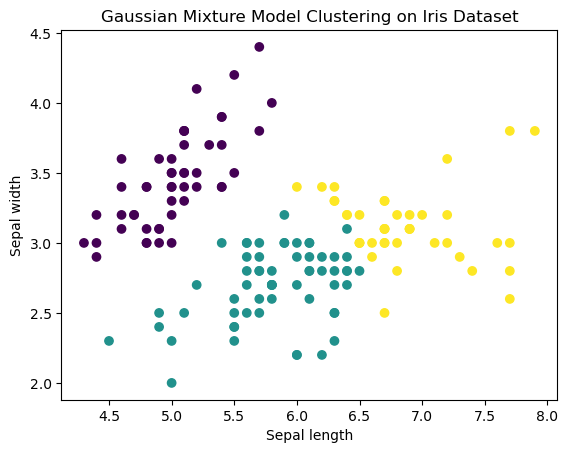

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Log-Likelihood: -1.4978006547501475


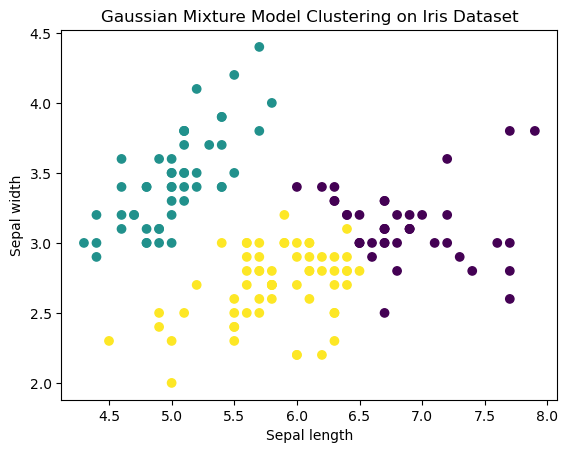

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Compute the log-likelihood of the data
log_likelihood = gmm.score(X)

# Print the log-likelihood
print("Log-Likelihood:", log_likelihood)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Log-Likelihood: -1.4980073602870045
AIC: 483.4022080861014
BIC: 534.5830080857377


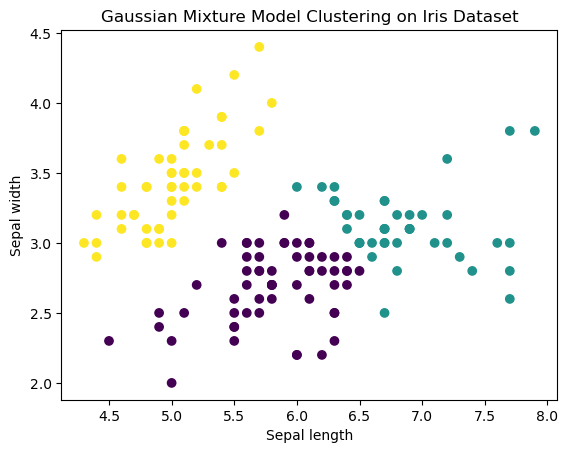

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity

# Create a Gaussian Mixture Model with 3 components/clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Compute the log-likelihood of the data
log_likelihood = gmm.score(X)

# Compute AIC and BIC
n_samples, _ = X.shape
aic = gmm.aic(X) #AIC (Akaike Information Criterion)
bic = gmm.bic(X) #BIC (Bayesian Information Criterion)

# Print the evaluation metrics
print("Log-Likelihood:", log_likelihood)
print("AIC:", aic)
print("BIC:", bic)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.show()
